# **Практическая работа 8: больше графиков и больше численного анализа**

## **План лекции**

- Обсуждение плана занятия
- Самостоятельная работа + вопросы

Сразу импортируем то, что нам понадобится:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Семинарские задания и домашние задания (0.8 баллов)

### Ну как всегда посмотрим на ошибки

**(0.05 балла)** Поправьте код в следующей ячейке:

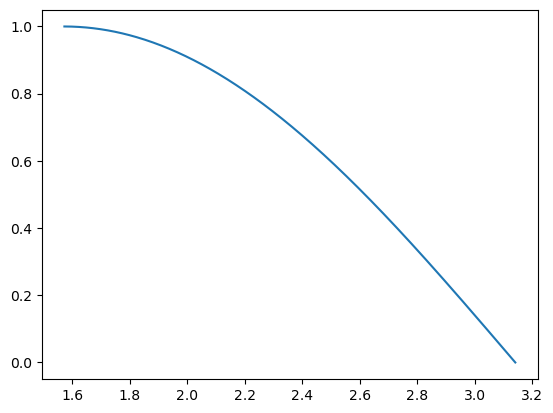

In [2]:
x = np.linspace(0, np.pi, 1000)
y = np.sin(x)

mask = x > np.pi/2

plt.plot(x[mask], y[mask])

**(0.05 балла)** Почему первый `plt.plot` рисует график, а второй ничего не рисует?

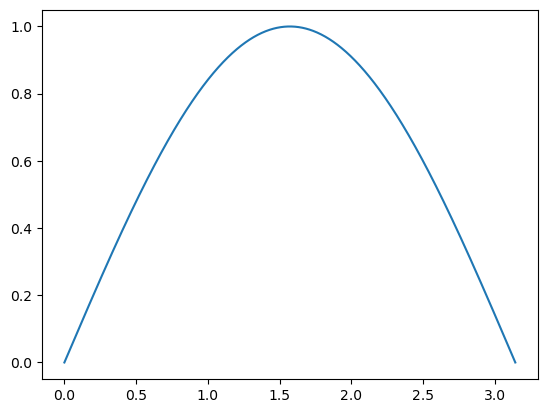

In [3]:
x = np.linspace(0, np.pi, 1000)
y = np.sin(x)

mask = x < -5

plt.plot(x, y, 'C0')
plt.plot(x[mask], y[mask], 'C1')
#  ничего не выводится потому что нет значений, удовлетворяющих условию x<-5

## Мотематичка может хватит...

**(0.05 балла)** Нарисуйте другим цветом ту часть графика, где `phi > pi`

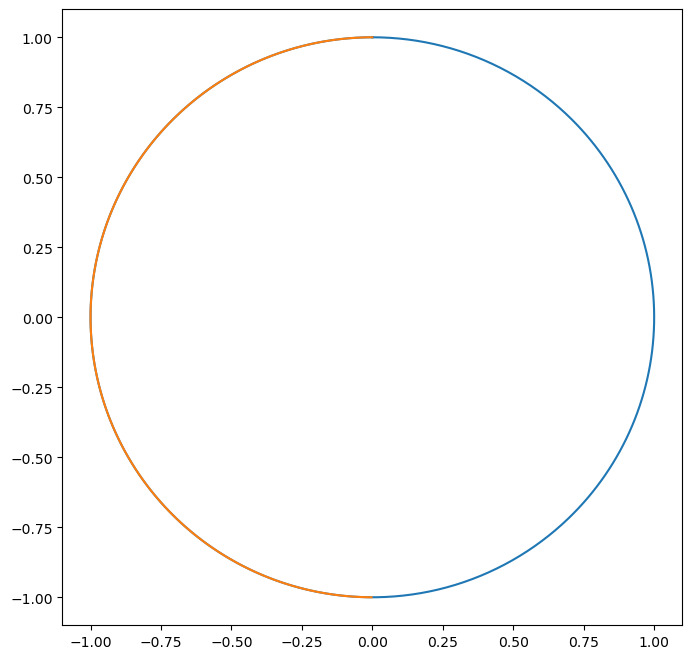

In [18]:
phi = np.linspace(0, 2*np.pi, 1000)
x = np.sin(phi)
y = np.cos(phi)

plt.figure(figsize=(8, 8))
mask = phi > np.pi

plt.plot(x, y)
plt.plot(x[mask], y[mask])

**(0.05 балла)** Нарисуйте разными цветами все 4 разных части графика:
- `x > 0, y > 0`
- `x < 0, y > 0`
- `x < 0, y < 0`
- `x > 0, y < 0`

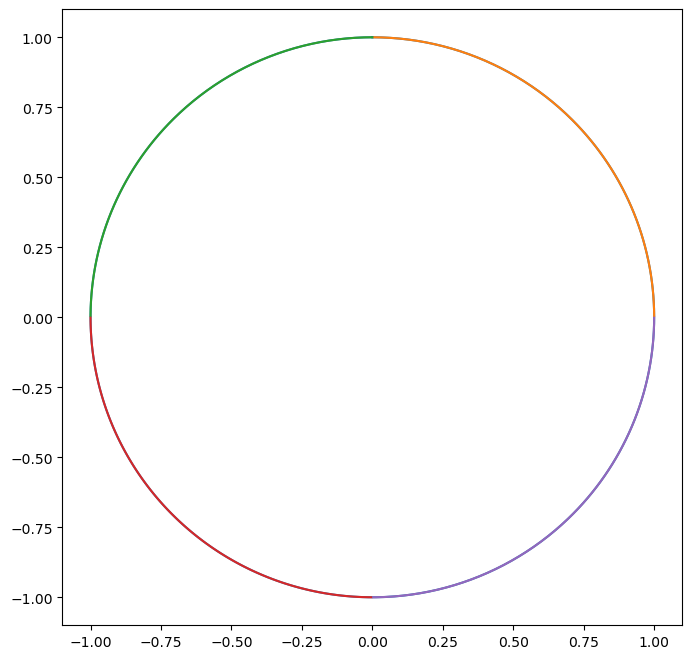

In [20]:
# Ваш код
phi = np.linspace(0, 2*np.pi, 1000)
x = np.sin(phi)
y = np.cos(phi)

plt.figure(figsize=(8, 8))
mask_1 = (x > 0) & (y > 0)
mask_2 = (x < 0) & (y > 0)
mask_3 = (x < 0) & (y < 0)
mask_4 = (x > 0) & (y < 0)
plt.plot(x, y)
plt.plot(x[mask_1], y[mask_1])
plt.plot(x[mask_2], y[mask_2])
plt.plot(x[mask_3], y[mask_3])
plt.plot(x[mask_4], y[mask_4])

## NaNi?...

В файле `data/nans.txt` лежат данные, часть из которых этот [NaN](https://en.wikipedia.org/wiki/NaN)-ы: специальная величина, которая говорит о том, что данные либо отсутствуют, либо повреждены, etc. 

**(0.05 балла)** Загрузите данные из файла и постройте график:

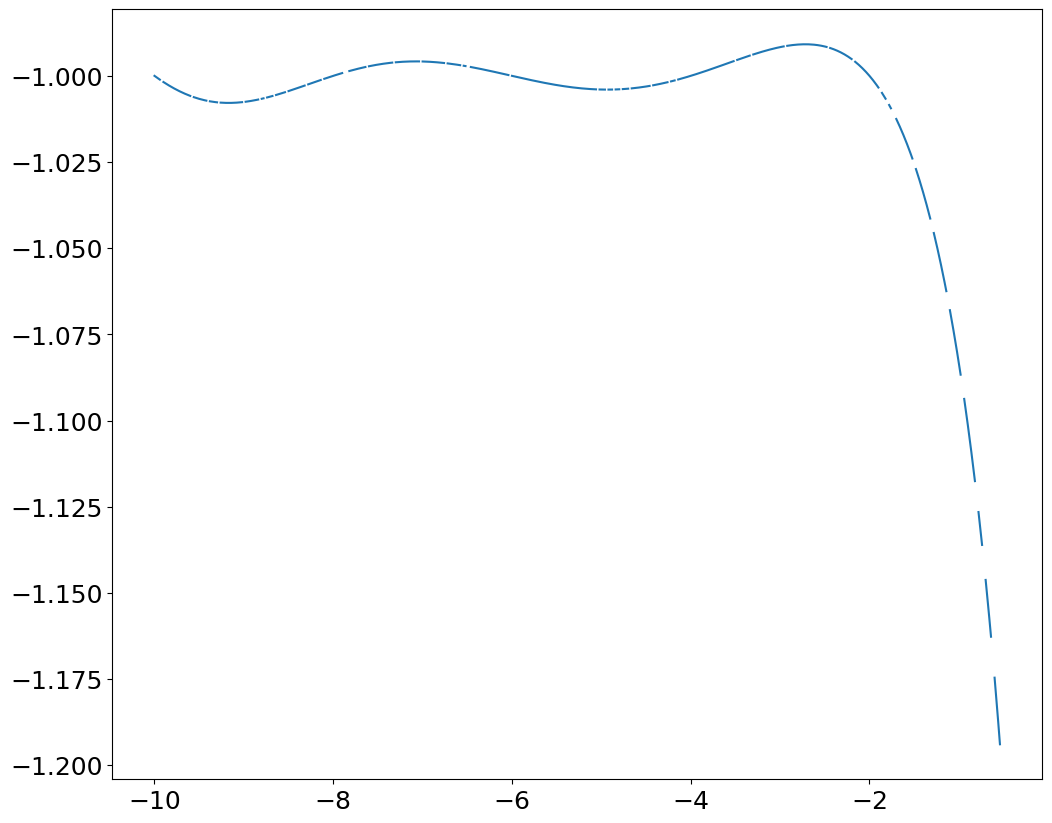

In [34]:
# Ваш код
Nan = np.loadtxt('data/nans.txt')
Nan
nan_1 = Nan[:,0]
nan_2 = Nan[:,1]
plt.figure(figsize=(12,10))
plt.plot(nan_1, nan_2)
plt.ylabel('', fontsize=18)     
plt.xlabel('',fontsize=18)           
plt.gca().tick_params(labelsize=18)

Функция `np.isnan` принимает на вход массив, а возвращает булевую маску, где значения `True` соответствуют тем ячейкам, в которых есть `NaN`. 

**(0.1 балла)**  Используя эту функцию, получите массив без `NaN` и постройте его на графике:

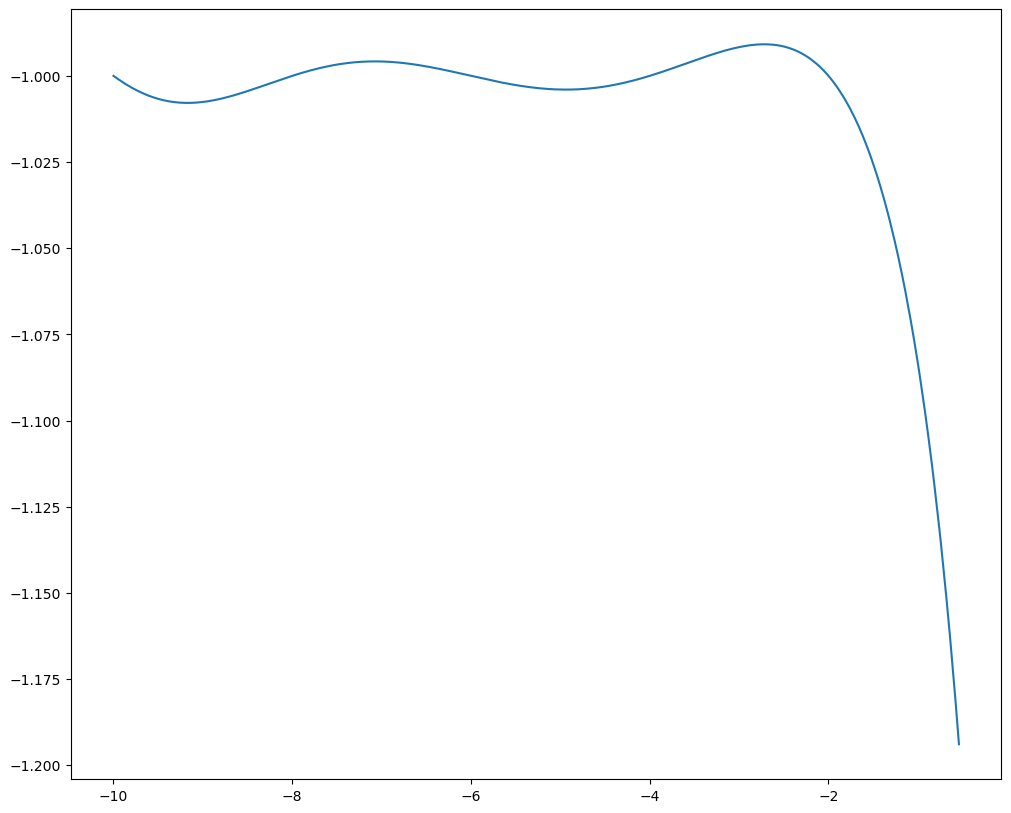

In [38]:
# Ваш код отрицание от маски ~without_nan_x
without_nan_y = np.isnan(nan_2) 
plt.figure(figsize=(12,10))
plt.plot(nan_1[~without_nan_y], nan_2[~without_nan_y])


## Визулизация климатических сценариев [IPCC AR6](https://en.wikipedia.org/wiki/IPCC_Sixth_Assessment_Report)

Межправительственная группа экспертов по изменению климата раз в несколько лет выпускает оценочный доклад по оценке изменения климата с использованием разных климатических моделей. Для того чтобы визуализировать данные предсказаний моделей, нужно рисовать доверительные интервалы моделей. 

**(0.1 балла)** Загрузите все `.csv` файлы из `panel_a`:

In [5]:
import pandas as pd

In [9]:
# Ваш код
Historical = pd.read_csv('data/panel_a/tas_global_Historical.csv')
SSP1_1 = pd.read_csv('data/panel_a/tas_global_SSP1_1_9.csv')
SSP1_2 = pd.read_csv('data/panel_a/tas_global_SSP1_2_6.csv')
SSP2_4 = pd.read_csv('data/panel_a/tas_global_SSP2_4_5.csv')
SSP3_7 = pd.read_csv('data/panel_a/tas_global_SSP3_7_0.csv')
SSP5_8 = pd.read_csv('data/panel_a/tas_global_SSP5_8_5.csv')

**(0.1 балл)** Нарисуйте средние данные (колонка `Mean`) от года из каждого `.csv` на одном графике. Оформите график (размер шрифта, размер графика, легенда, etc.). Здесь и далее можете ориентироваться на стиль [оригинального графика](https://www.ipcc.ch/report/ar6/wg1/figures/summary-for-policymakers/figure-spm-8/):

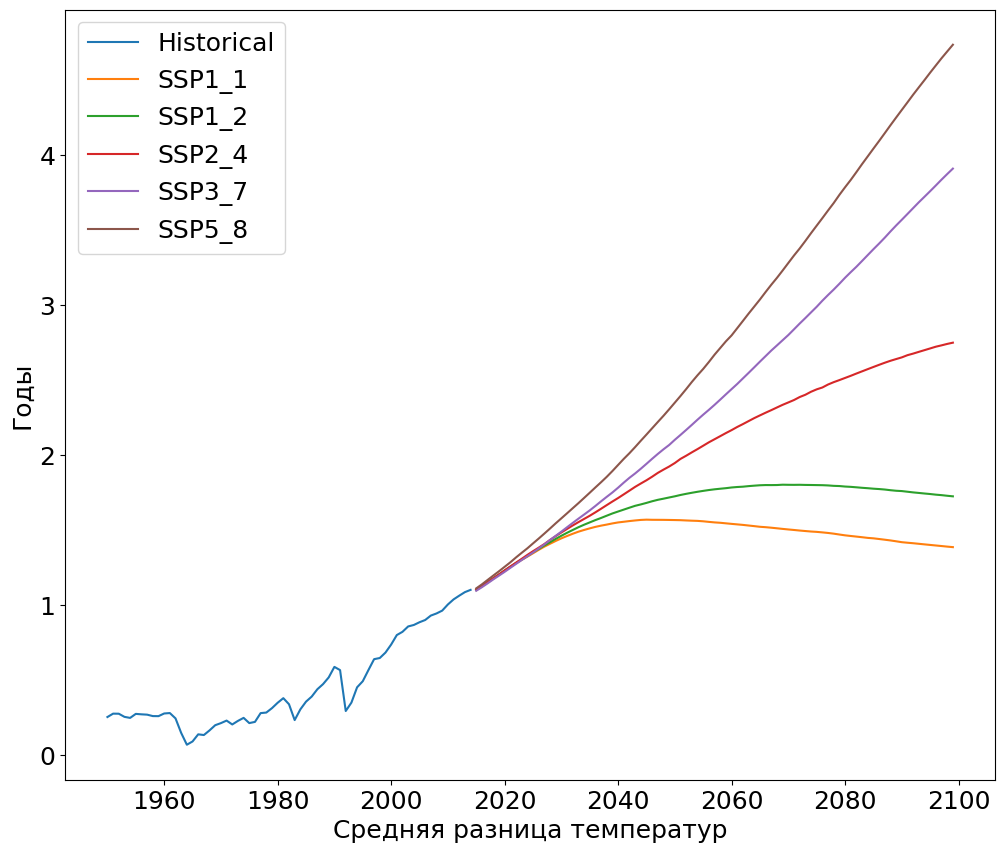

In [7]:
# Ваш код
plt.figure(figsize=(12,10))
plt.plot(Historical['Year'], Historical['Mean'], label='Historical')
plt.plot(SSP1_1['Year'], SSP1_1['Mean'], label='SSP1_1')
plt.plot(SSP1_2['Year'], SSP1_2['Mean'], label='SSP1_2')
plt.plot(SSP2_4['Year'], SSP2_4['Mean'], label='SSP2_4')
plt.plot(SSP3_7['Year'], SSP3_7['Mean'], label='SSP3_7')
plt.plot(SSP5_8['Year'], SSP5_8['Mean'], label='SSP5_8')

plt.ylabel('Годы', fontsize=18)     
plt.xlabel('Средняя разница температур',fontsize=18)  
plt.legend(fontsize=18) 
plt.gca().tick_params(labelsize=18) 

**(0.1 балл)** На этом же графике нарисуйте доверительные интервалы с помощью `plt.fill_between` с прозрачностью `alpha=0.1` (колонки `5%` и `95%`):

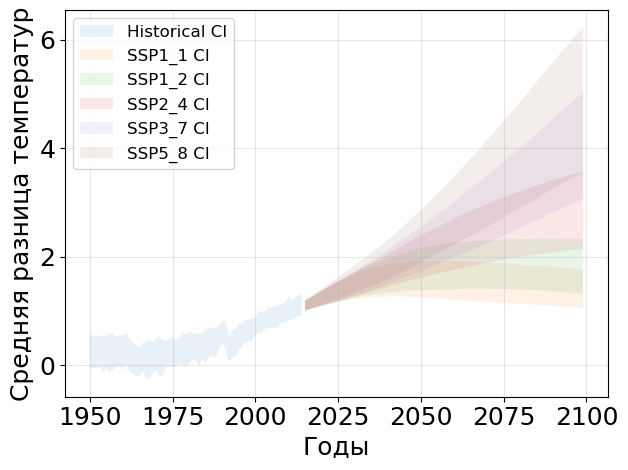

In [8]:
# Ваш код
plt.fill_between(Historical['Year'], Historical['5%'], Historical['95%'], alpha=0.1, label='Historical CI')
plt.fill_between(SSP1_1['Year'], SSP1_1['5%'], SSP1_1['95%'], alpha=0.1, label='SSP1_1 CI')
plt.fill_between(SSP1_2['Year'], SSP1_2['5%'], SSP1_2['95%'], alpha=0.1, label='SSP1_2 CI')
plt.fill_between(SSP2_4['Year'], SSP2_4['5%'], SSP2_4['95%'], alpha=0.1, label='SSP2_4 CI')
plt.fill_between(SSP3_7['Year'], SSP3_7['5%'], SSP3_7['95%'], alpha=0.1, label='SSP3_7 CI')
plt.fill_between(SSP5_8['Year'], SSP5_8['5%'], SSP5_8['95%'], alpha=0.1, label='SSP5_8 CI')
plt.xlabel('Годы', fontsize=18)     
plt.ylabel('Средняя разница температур', fontsize=18)  
plt.legend(fontsize=12)
plt.gca().tick_params(labelsize=18)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**(0.15 балла)** Нарисуйте в том же стиле (графики, доверительные интервалы, оформление) данные из `data/panel_d`

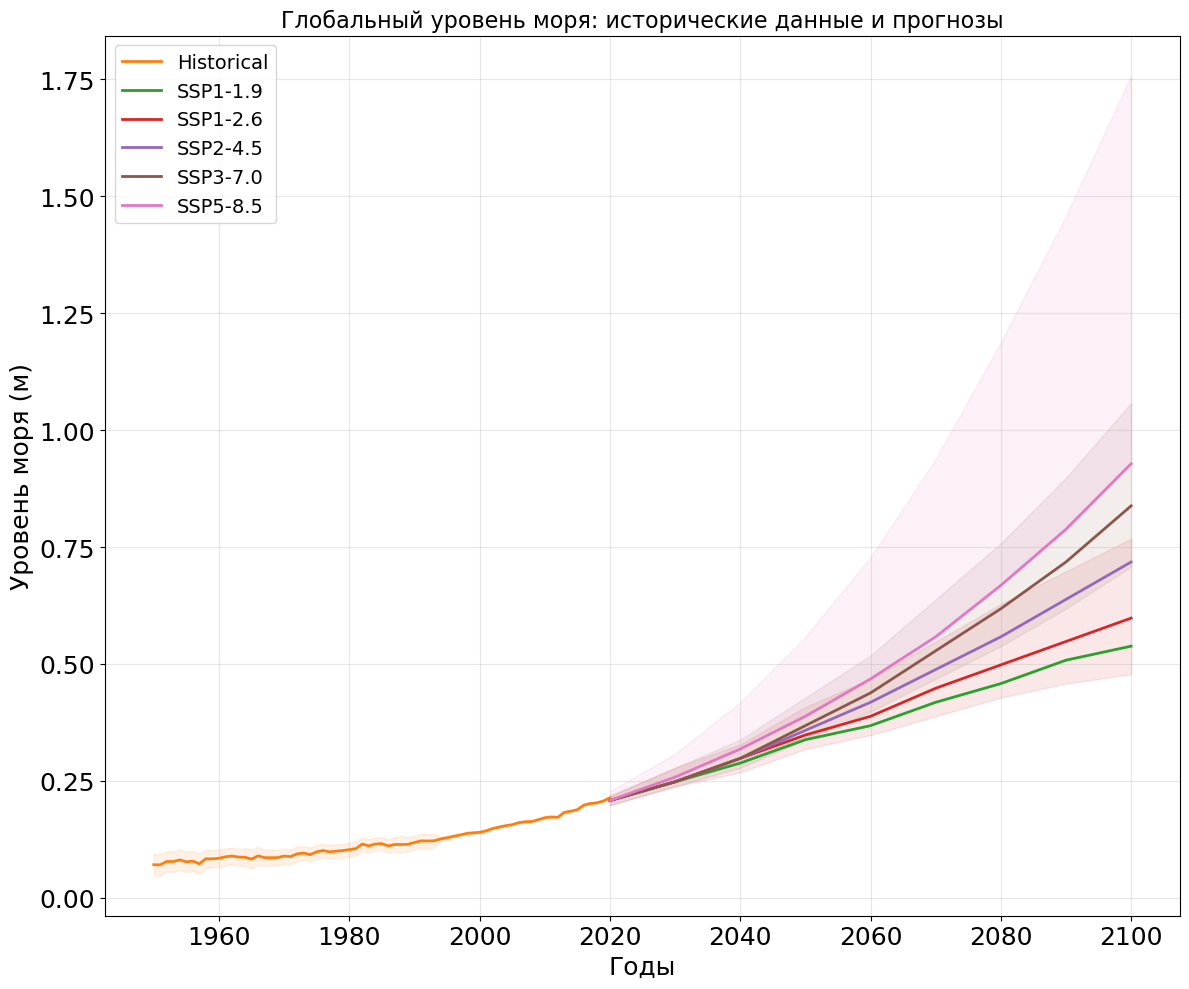

In [18]:
# Ваш код
sea_level_obs = pd.read_csv('data/panel_d/global_sea_level_observed.csv')
sea_level_proj = pd.read_csv('data/panel_d/global_sea_level_projected.csv')

plt.figure(figsize=(12, 10))

plt.plot(sea_level_obs['Year'], sea_level_obs['Central'], label='Historical', color='C1', linewidth=2)
plt.plot(sea_level_proj['Year'], sea_level_proj['SSP1-1.9 Central'], label='SSP1-1.9', color='C2', linewidth=2)
plt.plot(sea_level_proj['Year'], sea_level_proj['SSP1-2.6 Central'], label='SSP1-2.6', color='C3', linewidth=2)
plt.plot(sea_level_proj['Year'], sea_level_proj['SSP2-4.5 Central'], label='SSP2-4.5', color='C4', linewidth=2)
plt.plot(sea_level_proj['Year'], sea_level_proj['SSP3-7.0 Central'], label='SSP3-7.0', color='C5', linewidth=2)
plt.plot(sea_level_proj['Year'], sea_level_proj['SSP5-8.5 Central'], label='SSP5-8.5', color='C6', linewidth=2)

plt.fill_between(sea_level_obs['Year'], sea_level_obs['17%'], sea_level_obs['83%'], alpha=0.1, color='C1')
plt.fill_between(sea_level_proj['Year'], sea_level_proj['SSP1-2.6 17%'], sea_level_proj['SSP1-2.6 83%'], alpha=0.1, color='C3')
plt.fill_between(sea_level_proj['Year'], sea_level_proj['SSP3-7.0 17%'], sea_level_proj['SSP3-7.0 83%'], alpha=0.1, color='C5')
plt.fill_between(sea_level_proj['Year'], sea_level_proj['SSP5-8.5 Central'], sea_level_proj['SSP5-8.5 Low Confidence 83%'], alpha=0.1, color='C6')

plt.xlabel('Годы', fontsize=18)
plt.ylabel('Уровень моря (м)', fontsize=18)
plt.legend(fontsize=14)
plt.gca().tick_params(labelsize=18)
plt.grid(True, alpha=0.3)
plt.title('Глобальный уровень моря: исторические данные и прогнозы', fontsize=16)
plt.tight_layout()
plt.show()

**(0.1 балл)** Скомбинируйте два получившихся графика на `plt.subplots(2, 1)` (двух сабплотах один над другим):

In [ ]:
# Ваш код

## Ну и много ли этих ваших экзопланет...

(**0.05 балла**) Откройте с помощью `pandas` файл `data/exoplanets.csv`. В нем находится выборка экзопланет, открытых разными телескопами. Выберите только те, которые открыты [телескопом TESS](https://ru.wikipedia.org/wiki/TESS):

In [71]:
# Ваш код 

(**0.05 балла**) Какой у них максимальный орбитальный период (`pl_orbper`, дни)? 

In [ ]:
# Ваш код 

(**0.1 балла**) Как называется самая далекая открытая экзопланета (`sy_dist`, парсеки)?

In [1]:
# Ваш код 

(**0.1 балла**) Выберите только те, которые открыты [телескопом TESS](https://ru.wikipedia.org/wiki/TESS) в 2023-ем году:

In [ ]:
# Ваш код 

## Это че на Марсе такое??

В файле `data/co2ice.txt` лежит пример спектра отражения CO$_2$ льда на южной полярной шапке Марса (да, частично полярные шапки Марса состоят из CO$_2$ льда). Это кусок спектра, измеренного в ИК-диапазоне, а линии поглощения говорят нам о том, что это именно CO$_2$ лед, а не, скажем, водяной лед. 

**(0.1 балл)** Загрузите эти данные, постройте график и оформите его (описание столбцов есть в файле):

In [ ]:
# Ваш код

Мы хотим наглядно показать полосы поглощения CO$_2$, а конкретно полосу около 1430 нанометров (границы полосы на этом спектре: от 1375 нанометров до 1467 нанометров).

**(0.1 балл)** Выделите эту полос поглощения на графике другим цветом:

In [74]:
# Ваш код

## ✨✨ Читеры в `Minecraft`

За последние несколько лет в мире прохождения игр на скорость ([*спидраннинге*](https://en.wikipedia.org/wiki/Speedrunning)) `Minecraft` набрал самую большую популярность среди всех игр. Самой популярной категорией является прохождение случайного зерна без использования разного рода *глитчей* (способов обмануть игру). Такая категория называется `RSG 1.16`, и рекорд в ней на март 2024-го года [7 минут 1 секунда.](https://youtu.be/E3t24Urba6Y?si=EUhenyxNrUg_NShi)

В октябре 2020-го года в сообществе произошел скандал: ютубер `Dream`, который набрал популярность на прохождениях `Minecraft` на скорость, установил хорошее время (5-ое время на тот момент), однако его быстро обвинили в [подозрительно большом везении в случайных событиях](https://en.wikipedia.org/wiki/Dream_(YouTuber)#Speedrun_cheating_scandal). Спустя два месяца, волонтеры сообщества выпустили [подробное расследование](https://youtu.be/-MYw9LcLCb4?si=ktXgwL88yWpTriY7) и [статью](https://mcspeedrun.com/dream.pdf), убедительно показывающие то, что вероятность случайных событий в игре не соответствовала оригинальной игре, а следовательно, с ней происходили манипуляции. 

> ☝️ Подробнее про это на [русском](https://www.youtube.com/watch?v=mW0jeoStANg) и на английском [1](https://youtu.be/f8TlTaTHgzo?si=zanY_dA_UNjdiYPb) и [2](https://youtu.be/G3Yzk-3SZfs?si=xZ1F5pw9XrHGsiiT).

Одно из событий в этой игре имеет весьма сложную математическую структуру. Давайте попробуем его промоделировать!

### Введение

Для того чтобы пройти `Minecraft`, нужно попасть в `End` (измерение края), а чтобы попасть в `End`, нужно получить две вещи: `Blaze rods` ([Огненные стержни](https://ru.minecraft.wiki/w/%D0%9E%D0%B3%D0%BD%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D1%81%D1%82%D0%B5%D1%80%D0%B6%D0%B5%D0%BD%D1%8C)) и `Ender pearls` ([Жемчуг края](https://ru.minecraft.wiki/w/%D0%96%D0%B5%D0%BC%D1%87%D1%83%D0%B3_%D0%9A%D1%80%D0%B0%D1%8F)). Первые выпадают с Ифритов с вероятностью `50%`, а вот вторые обычно добываются с помощью бартера с [Пиглинами](https://ru.minecraft.wiki/w/%D0%9F%D0%B8%D0%B3%D0%BB%D0%B8%D0%BD). В 2020-ом году успех торговли с Пиглинами очень сильно зависел от количества найденного золота.

### Механика бартера

Бартер работает следующим образом:
- Игрок дает в руки пиглину один слиток золота
- Пиглин дает один из случайно выбранных предметов согласно [таблице добычи](https://ru.minecraft.wiki/w/%D0%A2%D0%BE%D0%B2%D0%B0%D1%80%D0%BE%D0%BE%D0%B1%D0%BC%D0%B5%D0%BD#%D0%9F%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81)
- После этого выбирается случайное количество этого предмета согласно этой же таблицы

В версии 1.16 вероятность выглядела следующим образом: вероятность получить `Жемчуг края` составляла `~4.73%`, при этом количество выпавших жемчугов было от 4 до 8. Для уверенного попадания в измерение края необходимо 12 жемчуга. 

### Как выглядит распределение интегральной вероятности получения 12-ти жемчуга от количества золотых слитков в инвентаре игрока?

- Для примера возьмите 25 золота
- Для каждого золота подсчитайте шанс в 0.0473
- Для удачных трейдов сгенрируйте равномерно распредленную случайную величину от 4 до 8
- Повторите `n` раз, подберите это значение сами, точно `n > 10000`
- **(0.3 балла)** (опционально) Нарисуйте гистограмму полученных результатов
- **(0.1 балл)** Посчитайте суммарную вероятность получения 12 и больше жемчуга
- **(0.2 балла)** Посчитайте это распредление для каждого количества золота от 1 до 50
- ✨ С помощью `plt.pcolormesh` постройте двумерное распредление количества золота и количества полученных жемчугов края

In [47]:
# Ваш код